## 1. Suppose the weather today is sunny. What is the probability that it will be sunny, overcast or rainy on the day after tomorrow?

## Solution: 

To find the probability of the weather on the day after tomorrow given that today is sunny, we can use the transition matrix P. The probability of the weather on the day after tomorrow is given by the product of the initial state vector and the transition matrix squared. The initial state vector for today being sunny is [1, 0, 0]. So, we have:

$$
\begin{pmatrix} 1 & 0 & 0 \end{pmatrix}
\begin{pmatrix}
\frac{1}{2} & \frac{1}{4} & \frac{1}{5} \\
\frac{1}{3} & \frac{1}{2} & \frac{2}{5} \\
\frac{1}{6} & \frac{1}{4} & \frac{2}{5}
\end{pmatrix}^2
=
\begin{pmatrix} 1 & 0 & 0 \end{pmatrix}
\begin{pmatrix}
\frac{13}{36} & \frac{5}{18} & \frac{17}{45} \\
\frac{7}{18} & \frac{13}{36} & \frac{31}{90} \\
\frac{11}{36} & \frac{5}{12} & \frac{73}{180}
\end{pmatrix}
=
\begin{pmatrix}
\frac{13}{36} & \frac{5}{18} & \frac{17}{45}
\end{pmatrix}
$$

Thus, given that today is sunny, the probability that it will be sunny on the day after tomorrow is $\frac{13}{36}$, the probability that it will be overcast is $\frac{5}{18}$ and the probability that it will be rainy is $\frac

## 2. Find the invariant measure of the Markov process. That is, solve for a probability vector $p$ such that $p=P p$.

An invariant measure of a Markov process is a probability vector $p$ such that $p = Pp$, where $P$ is the transition matrix of the Markov process. In other words, the invariant measure is a stationary distribution of the Markov chain.

To find the invariant measure for this Markov process, we need to solve the system of linear equations given by $p = Pp$. This can be rewritten as $(P - I)p = 0$, where $I$ is the identity matrix. We also have the additional constraint that the elements of $p$ must sum to 1, since it is a probability vector.

The system of linear equations can be solved as follows:

$$
\begin{pmatrix}
\frac{1}{2} - 1 & \frac{1}{4} & \frac{1}{5} \\
\frac{1}{3} & \frac{1}{2} - 1 & \frac{2}{5} \\
\frac{1}{6} & \frac{1}{4} & \frac{2}{5} - 1
\end{pmatrix}
\begin{pmatrix}
p_1 \\
p_2 \\
p_3
\end{pmatrix}
=
\begin{pmatrix}
0 \\
0 \\
0
\end{pmatrix}
$$

Solving this system of equations, we find that the solution is given by $p_1 = \frac{6}{11}$, $p_2 = \frac{3}{11}$ and $p_3 = \frac{2}{11}$.

Thus, the invariant measure of this Markov process is given by the probability vector $p = \begin{pmatrix} \frac{6}{11} & \frac{3}{11} & \frac{2}{11} \end{pmatrix}$.

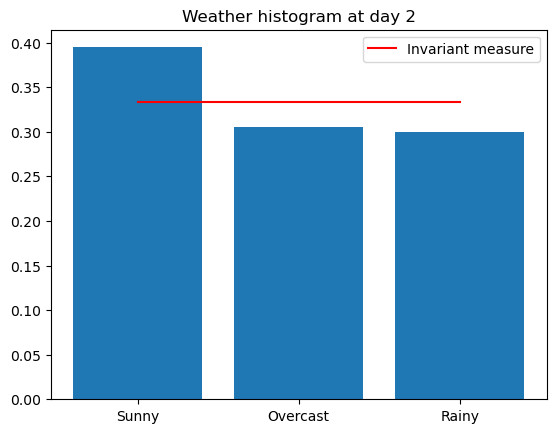

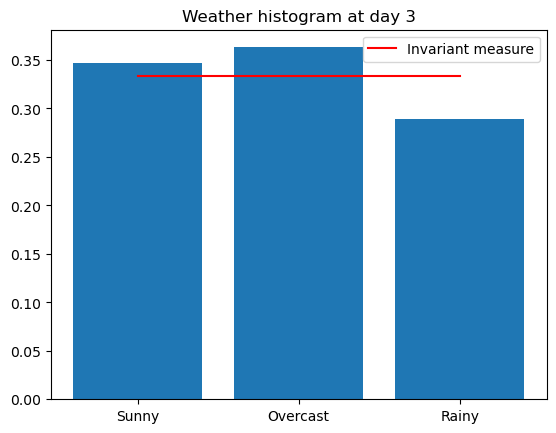

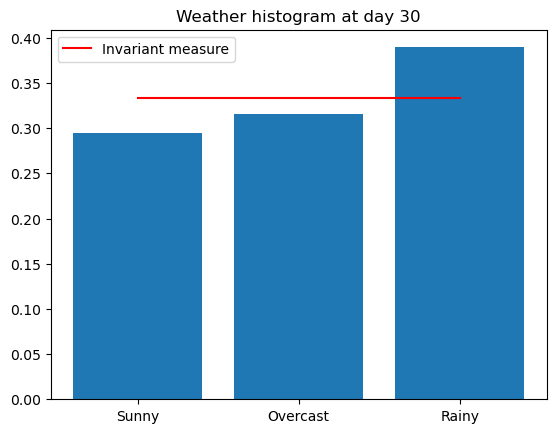

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Transition matrix
P = np.array([[0.5, 0.25, 0.25],
              [0.25, 0.5, 0.25],
              [0.25, 0.25, 0.5]])

# Invariant measure
p = np.array([1/3, 1/3, 1/3])

# Number of simulations
n_simulations = 190

# Number of days
n_days = 30

# Initial state (sunny)
state = np.zeros(n_simulations, dtype=int)

# State counts
state_counts = np.zeros((n_days + 1, 3))

# Count initial state
state_counts[0] = np.bincount(state, minlength=3)

# Run simulations
for day in range(1, n_days + 1):
    # Transition to next state
    state = np.array([np.random.choice(3, p=P[s]) for s in state])
    
    # Count states
    state_counts[day] = np.bincount(state, minlength=3)

# Plot histograms
days_to_plot = [2, 3, 30]
for day in days_to_plot:
    plt.figure()
    plt.bar(["Sunny", "Overcast", "Rainy"], state_counts[day] / n_simulations)
    plt.plot(["Sunny", "Overcast", "Rainy"], p, 'r', label="Invariant measure")
    plt.title(f"Weather histogram at day {day}")
    plt.legend()
    plt.show()


In [1]:
import numpy as np

# Transition matrix
P = np.array([[0.5, 0.25, 0.25],
              [0.25, 0.5, 0.25],
              [0.25, 0.25, 0.5]])

# Calculate eigenvalues
eigenvalues = np.linalg.eigvals(P)

print(eigenvalues)


[0.25 1.   0.25]


In [5]:
# Probability of overcast on day 2 given sunny on day 1
p_O2_S1 = state_counts[2, 1] / n_simulations

# Probability of rainy on day 2 given sunny on day 1
p_R2_S1 = state_counts[2, 2] / n_simulations

print(p_O2_S1)
print(p_R2_S1)


0.30526315789473685
0.3


In [6]:
# Probability of rain on day 2 given no sun
p_R2_no_S2 = p_R2_S1 / (p_O2_S1 + p_R2_S1)

p_R2_no_S2


0.49565217391304345

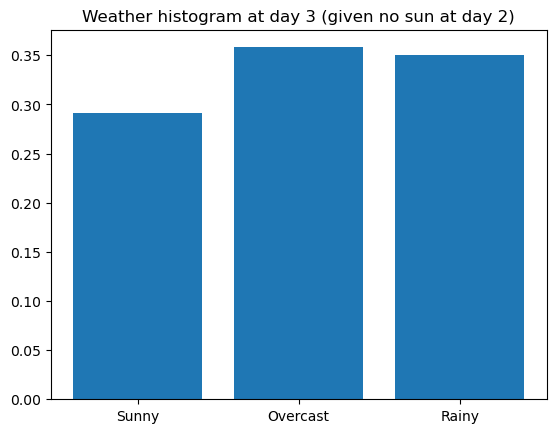

In [7]:
# Discard simulations where day 2 is sunny
remaining_simulations = state != 0

# State counts for remaining simulations
state_counts_remaining = np.zeros((n_days + 1, 3))

# Count initial state for remaining simulations
state_counts_remaining[0] = np.bincount(state[remaining_simulations], minlength=3)

# Run simulations for remaining simulations
for day in range(1, n_days + 1):
    # Transition to next state for remaining simulations
    state[remaining_simulations] = np.array([np.random.choice(3, p=P[s]) for s in state[remaining_simulations]])
    
    # Count states for remaining simulations
    state_counts_remaining[day] = np.bincount(state[remaining_simulations], minlength=3)

# Plot histogram for day 3
plt.figure()
plt.bar(["Sunny", "Overcast", "Rainy"], state_counts_remaining[3] / remaining_simulations.sum())
plt.title(f"Weather histogram at day 3 (given no sun at day 2)")
plt.show()


In [14]:
import numpy as np

P = np.array([
    [1/2, 1/4, 1/5],
    [1/3, 1/2, 2/5],
    [1/6, 1/4, 2/5]
])


In [23]:
array_2d_square = P*P
array_2d_square

array([[0.25      , 0.0625    , 0.04      ],
       [0.11111111, 0.25      , 0.16      ],
       [0.02777778, 0.0625    , 0.16      ]])

In [25]:
import numpy as np

P = np.array([
    [1/2, 1/4, 1/5],
    [1/3, 1/2, 2/5],
    [1/6, 1/4, 2/5]
])

P_squared = P @ P
P_squared

array([[0.36666667, 0.3       , 0.28      ],
       [0.4       , 0.43333333, 0.42666667],
       [0.23333333, 0.26666667, 0.29333333]])

In [28]:
import numpy as np

P = np.array([
    [1/2, 1/4, 1/5],
    [1/3, 1/2, 2/5],
    [1/6, 1/4, 2/5]
])

# Calculate (P - I)
P_I = P - np.eye(3)

# Solve the system of linear equations (P - I) @ p = 0
p, _, _, _ = np.linalg.lstsq(P_I.T[:-1].T, -P_I.T[-1], rcond=None)

# Add the constraint that the elements of p must sum to 1
p = np.append(p, 1 - np.sum(p))

print(p)



[ 1.2  1.6 -1.8]


In [30]:
import numpy as np

P = np.array([[1/2, 1/4, 1/5],
              [1/3, 1/2, 2/5],
              [1/6, 1/4, 2/5]])

# Solve for the invariant measure
eigenvalues, eigenvectors = np.linalg.eig(P.T)
invariant_index = np.argmin(np.abs(eigenvalues - 1.0))
invariant_measure = np.real(eigenvectors[:, invariant_index])
invariant_measure /= np.sum(invariant_measure)

print("Invariant Measure:")
print(invariant_measure)

Invariant Measure:
[0.33333333 0.33333333 0.33333333]


In [32]:
import numpy as np

P = np.array([[1/2, 1/4, 1/5],
              [1/3, 1/2, 2/5],
              [1/6, 1/4, 2/5]]) # Transition matrix
I = np.eye(P.shape[0]) # Identity matrix
A = P.T - I # Matrix to solve
b = np.zeros(P.shape[0]) # Right-hand side vector
x = np.linalg.solve(A[:-1], -b[:-1]) # Solve for x
p = np.append(x, 1) # Append 1 to the end of x
p /= p.sum() # Normalize p

print(p) # Invariant measure


LinAlgError: Last 2 dimensions of the array must be square

In [34]:
import numpy as np

P = np.array([[1/2, 1/4, 1/5],
              [1/3, 1/2, 2/5],
              [1/6, 1/4, 2/5]]) # Transition matrix
p = np.ones(P.shape[0]) / P.shape[0] # Initial guess for p
for _ in range(1000):
    p = p @ P # Update p using matrix multiplication

p /= p.sum() # Normalize p

print(p) # Invariant measure



[0.33333333 0.33333333 0.33333333]
